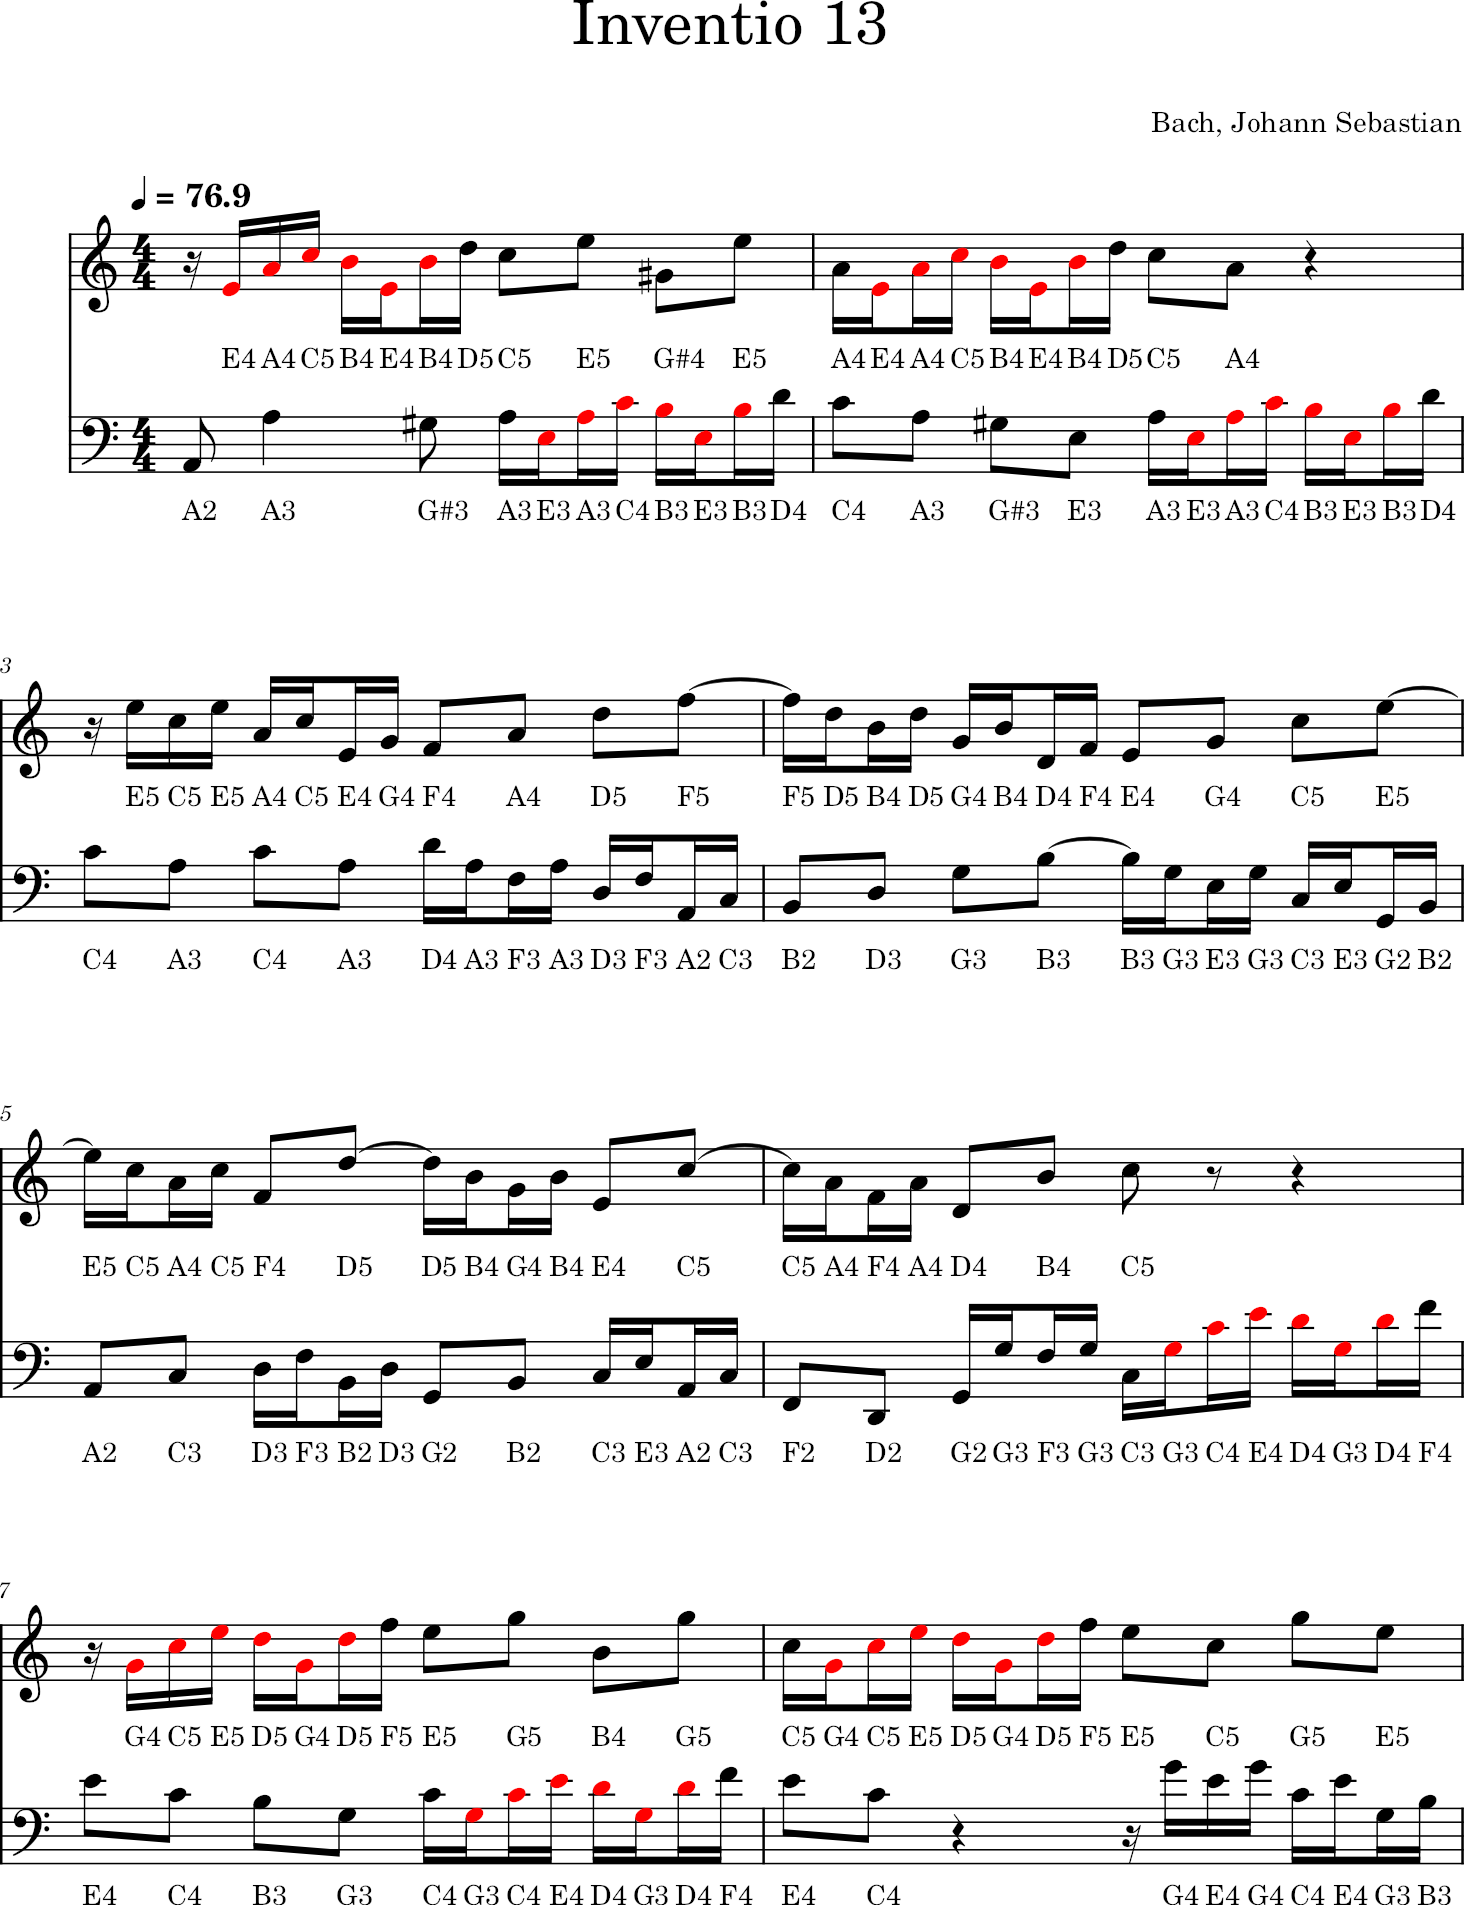

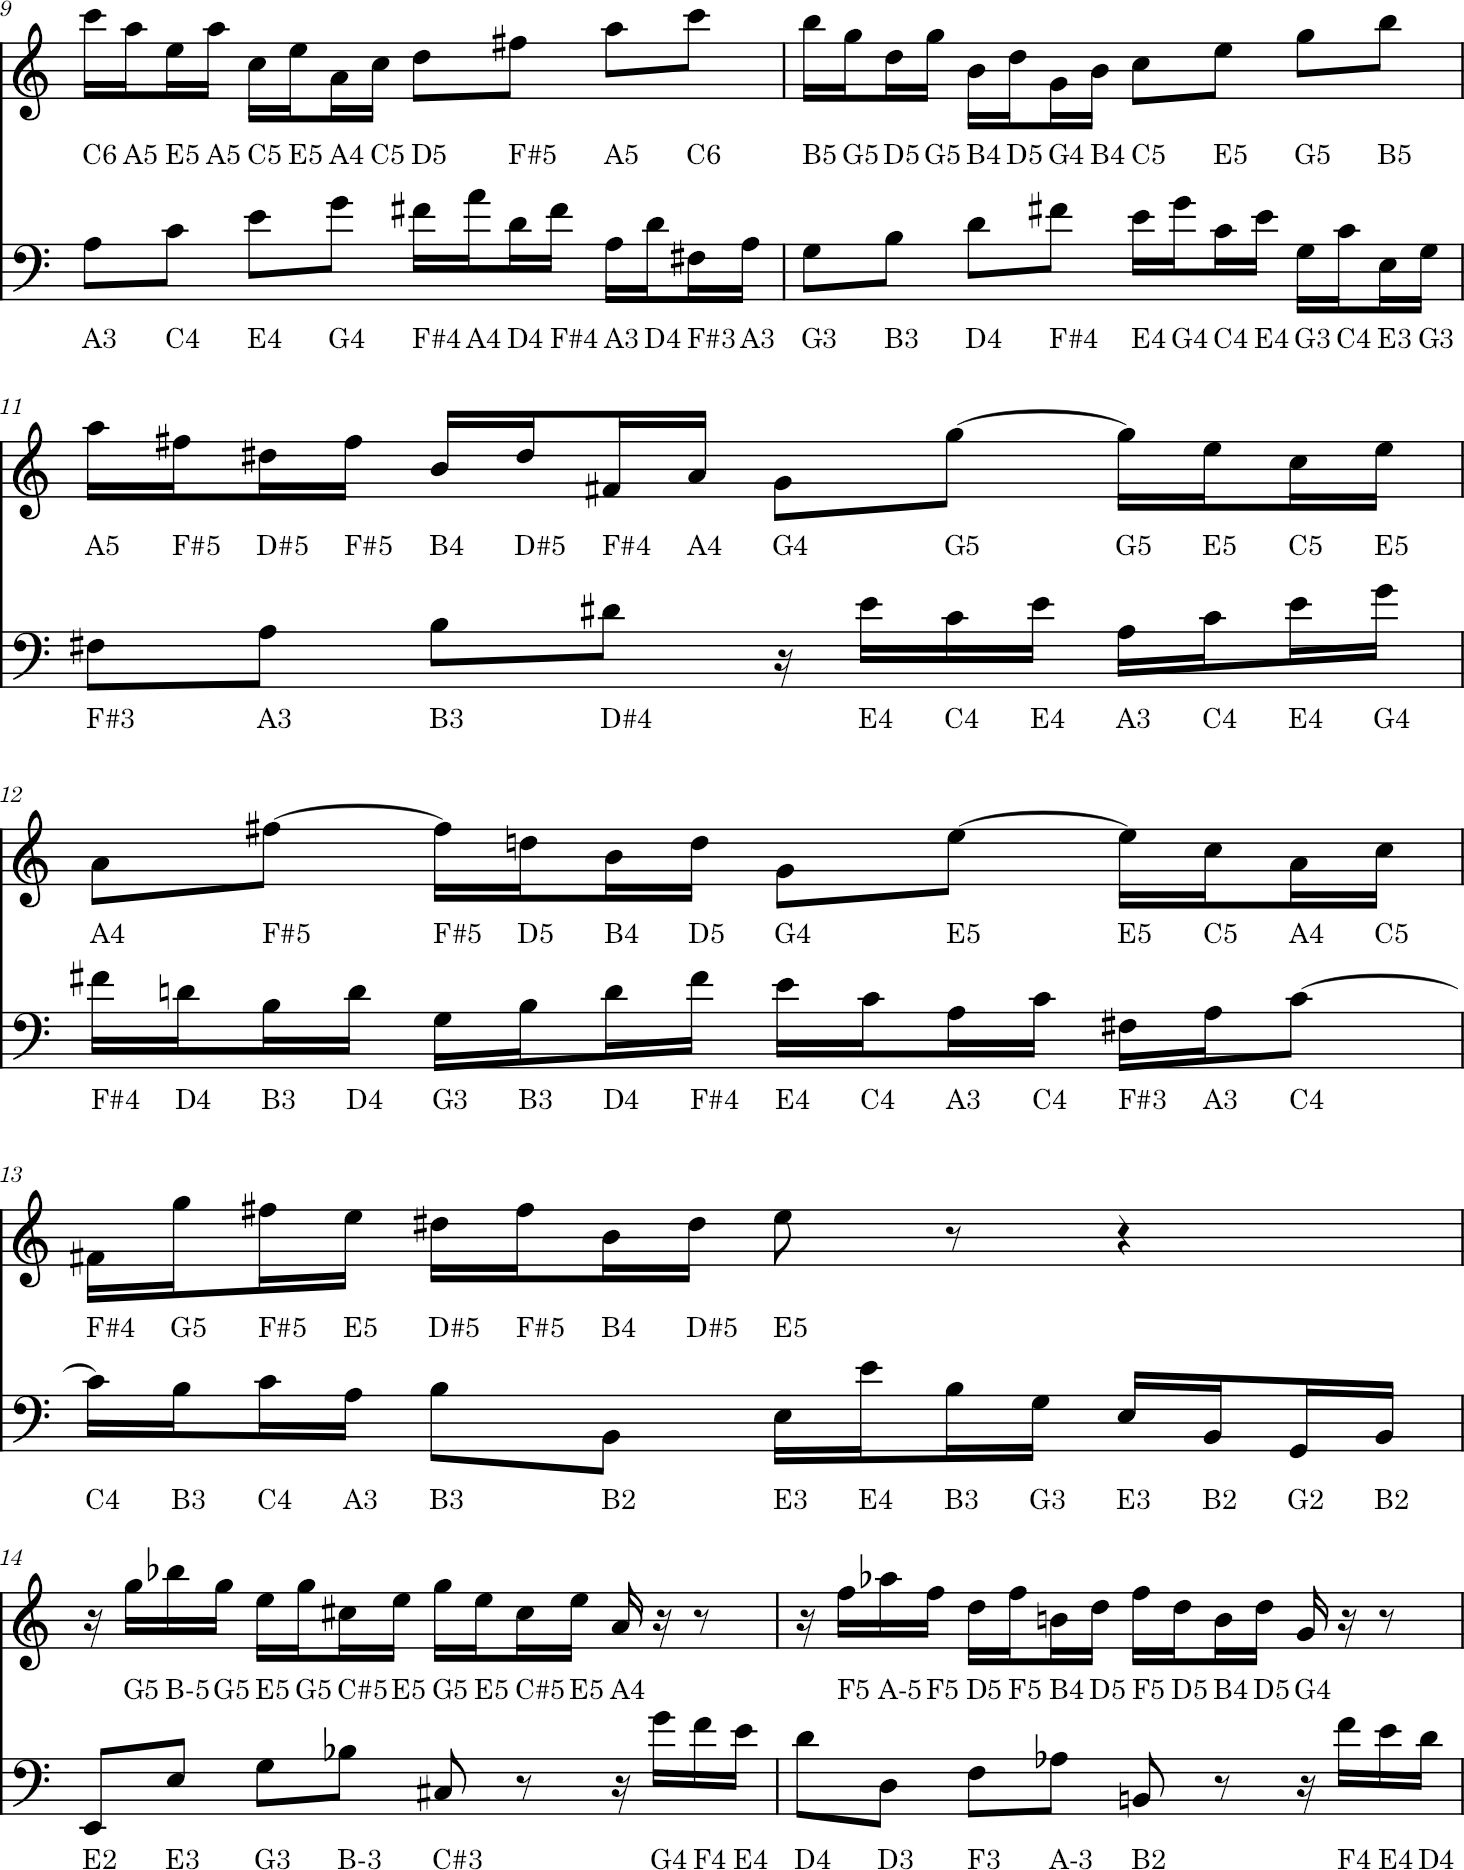

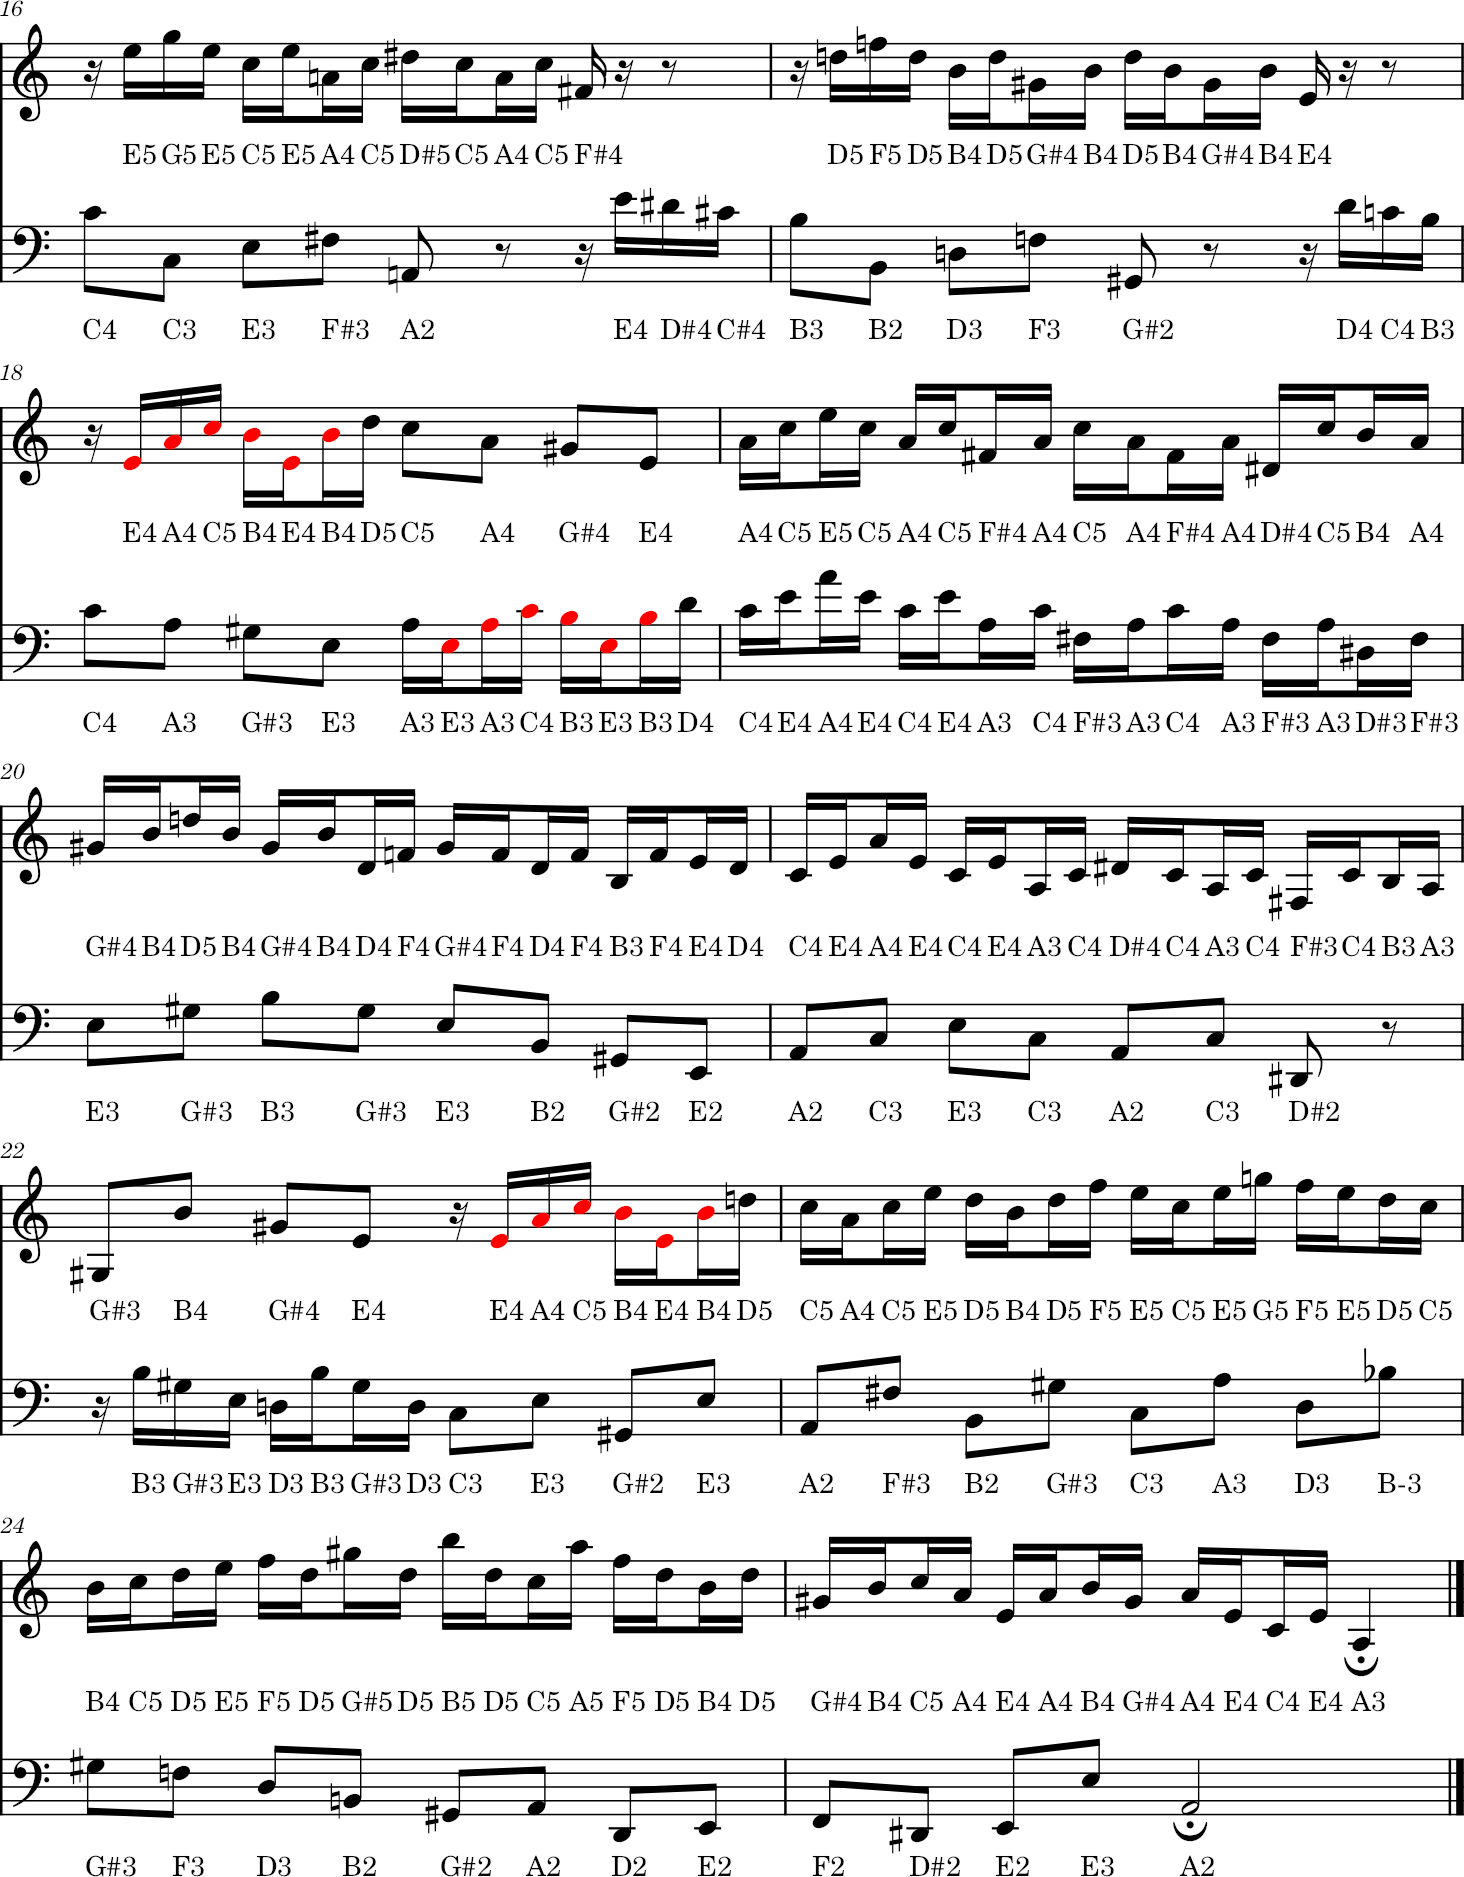

The pattern repeats 6 times in the soprano part.
The pattern repeats 5 times in the bass voice part.


In [26]:
from music21 import interval, converter

score = converter.parse('inven13.krn')
soprano_part = score.parts[0] # Adjust the index if necessary
bass_part = score.parts[1] # Adjust the index if necessary

# Function to highlight the pattern in red for a given part
def highlight_pattern_in_part(part, pattern):
    notes = [n for n in part.flat.notes]
    intervals_and_directions = []
    for i in range(len(notes) - 1):
        interval_obj = interval.Interval(notes[i], notes[i+1])
        direction = 'ascending' if interval_obj.direction == 1 else 'descending'
        interval_value = interval_obj.generic.directed
        intervals_and_directions.append((interval_value, direction))

    pattern_count = 0
    for i in range(len(intervals_and_directions) - len(pattern) + 1):
        if intervals_and_directions[i:i+len(pattern)] == pattern:
            pattern_count += 1
            # Highlight the notes in the pattern in red
            for j in range(len(pattern)):
                notes[i+j].style.color = 'red'
    return pattern_count

#adds notes to score
def notes_to_score(score):
    for elem in score.recurse():
        if isinstance(elem, note.Note):
            # For single notes, annotate with the note name and octave
            elem.lyrics.append(note.Lyric(elem.nameWithOctave))
        elif isinstance(elem, chord.Chord):
            # For chords, annotate with each note's name in the chord
            chord_notes = '\n'.join(p.nameWithOctave for p in elem.pitches)
            elem.lyrics.append(note.Lyric(chord_notes))


# Define the pattern to search for
pattern = [(4, 'ascending'), (3, 'ascending'), (-2, 'descending'), (-5, 'descending'), (5, 'ascending'), (3, 'ascending')]

# Highlight the pattern in red for both parts
soprano_pattern_count = highlight_pattern_in_part(soprano_part, pattern)
bass_pattern_count = highlight_pattern_in_part(bass_part, pattern)
notes_to_score(score)

# Display the score with highlighted notes
score.show()

print(f"The pattern repeats {soprano_pattern_count} times in the soprano part.")
print(f"The pattern repeats {bass_pattern_count} times in the bass voice part.")
